[[1]
 [1]] [[0.0066  ]
 [0.010254]] end


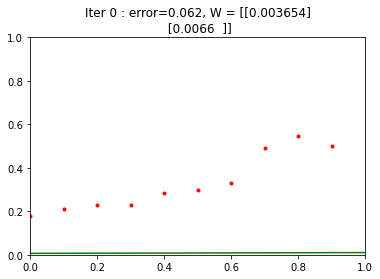

[[1]
 [1]] [[0.01303511]
 [0.02026289]] end


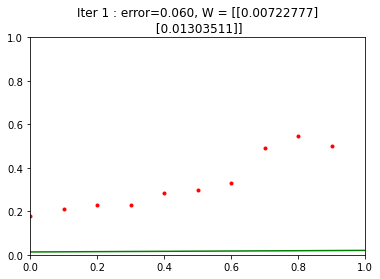

[[1]
 [1]] [[0.01930936]
 [0.03003262]] end


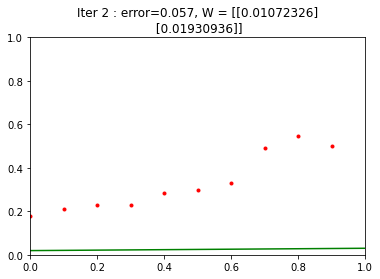

[[1]
 [1]] [[0.23779174]
 [0.39637846]] end


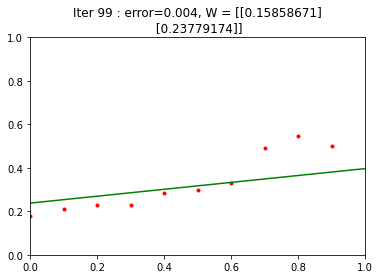

[[1]
 [1]] [[0.24450075]
 [0.44457051]] end


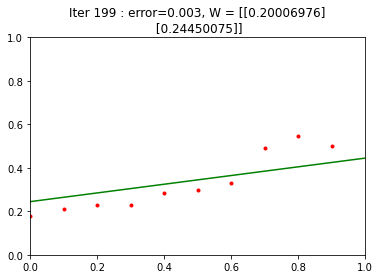

[[1]
 [1]] [[0.23327144]
 [0.46131385]] end


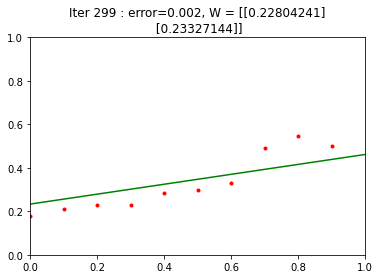

[[1]
 [1]] [[0.22201336]
 [0.47377864]] end


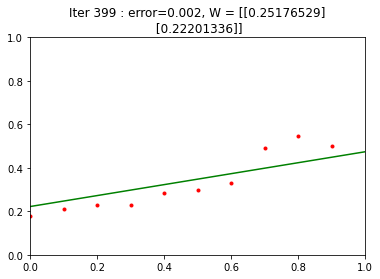

[[1]
 [1]] [[0.21205976]
 [0.48447905]] end


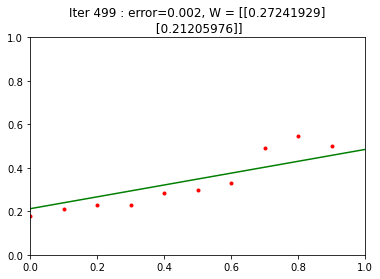

模型的参数是：W = [[0.27241929]
 [0.21205976]], 预估的2019房价为：[[4.84479046]] 万元


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

#梯度下降法（vectorization）
def fit(x, target):
    '''
    x.shape:       num_sample x num_feature
    target.shape:  num_sample x 1
    '''
    
    # 增加X维度，匹配theta个数，值全为1
    x_hat  = np.ones((x.shape[0], x.shape[1] + 1))
    # 复制X原始值到第1列
    x_hat[:, 0] = x[:, 0]
    # 系数（特征）个数
    nfeature = x_hat.shape[1]
    # 多少种结果，目前是1
    nclass   = target.shape[1]
    m = target.shape[0]  # 样本数
    
    lr = 0.02
#     W = np.random.normal(0, 1.0, size=(nfeature, nclass)) # 得到2行1列的系数(theta)值
#     W[-1] = 0     # 偏置初始化为0
    W = np.zeros((nfeature, nclass)) #  吴恩达的课程直接用0来初始全部theta
    
    plt.figure()
    for i in range(500):

        predict = x_hat @ W                            # 即X*theta
        err = np.sum((predict - target)** 2) / (2*m)     # 每次的diff
        
        # deltaA = G @ B^T
        # deltaB = A^T @ G
        G = (predict - target) / m
        delta_W = x_hat.T @ G
        W = W - lr * delta_W

        if (i + 1) % 100 == 0 or i < 3:
            # 对于x，取值为0到1，然后添加了一个维度特征1
            tx = np.array([
                [0, 1],
                [1, 1]
            ])
            ty = tx @ W
            print(tx[:,1:], ty, "end")
            plt.clf()
            plt.title(f"Iter {i} : error={err:.3f}, W = {W}")
            plt.plot(x, target, "r.")
#             plt.plot(tx[:, 0:1], ty, 'g-')
            plt.plot([0,1], ty, 'g-')
            plt.axis([0, 1, 0, 1])
            plt.pause(0.01)

    return W

#我们定义房价数据
x = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=np.float32).T
y = np.array([[1.8, 2.1, 2.3, 2.3, 2.85, 3.0, 3.3, 4.9, 5.45, 5.0]], dtype=np.float32).T

#数据归一化
x = x / 10.0
y = y / 10.0

#梯度下降法求解
W = fit(x, y)

#估算2019年的房价多少
#归一化
x_2019 = (2019-2009) / 10.0

# 定义的房价数据中添加了1
v_2019 = np.array([
    [x_2019, 1]
]) @ W

#结果反归一化
v_2019 = v_2019 * 10
print(f"模型的参数是：W = {W}, 预估的2019房价为：{v_2019} 万元")

$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})\cdot x^{(i)}_j$

$\delta = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})\cdot x^{(i)}_j$

$\therefore \delta = \begin{bmatrix} \delta_0 \\ \delta_1  \\ \vdots \end{bmatrix}\ \Rightarrow\ \theta := \theta - \alpha \cdot \delta$

这种写法可以先不管矩阵乘法的链式求导，而直接用点乘然后sum的方式， 
下面还是按课程的矩阵乘法来练习

[5.57999997]


array([293081.46433493])

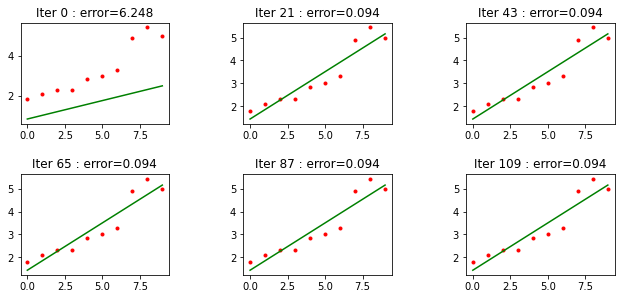

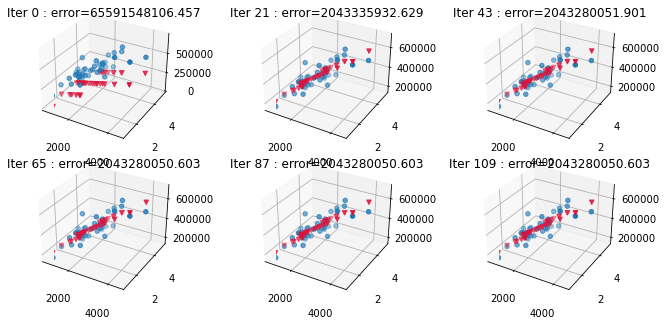

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def my_fit(x, y):
    # 0. setup
    m     = y.shape[0]            # 样本数量
    n     = x.shape[1]+1          # 特征数量(会加1列1)
    a     = 0.5                   # alpha, learning rate
    
    # 1. normalize x
    mu    = np.mean(x, 0)         # 以列为维度进行mean
    std   = np.std(x, 0, ddof=1)  # ddof=1 保证输出与matlab一致，不是必要的
    X     = (x - mu) / std        # normalized to (0, 1)
    
    # 2. ajdust dim of x to fit with dim of theta
    st1   = np.ones((m, 1))
    X     = np.hstack([st1, X])
    
    # 3. set theta
    theta = np.zeros((n, 1))      # theta个数与特征数保持一致 我们用0初始，也可以用随机数
    
    # 4. do gradient descent
    
    # 绘图相关
    ctr = 0
    # 这里用到了一个技巧：subplot_kw用来设置subplot能用的属性而没有暴露到subplots方法里的
    suplotkw = {"subplot_kw": {'projection': '3d'} if n > 2 else {}}
    fig, axs = plt.subplots(nrows=2, ncols=3, **suplotkw)
    fig.subplots_adjust(hspace=.5, wspace=.5, top=1, right=1.5)
    axes = axs.flatten() 
    
    for i in range(110):
        # 计算方法
        # h(x)   = X * theta                # {m,n}x{n,1}={m,1} # 每次估算的偏差
        # f(x)   = 1/2m * sum((h(x) - y)^2) # mse
        # f'(x)  = 1/m * (hx - y) * h'(x)   # 对theta求导
        # G = AB g'a = A'@BT, g'b = AT@B'   # 矩阵乘法的chain rule
        # 如果是矩阵，*表示点乘，如果是数组，*表示元素相乘，@才表示点乘
        predict   = X @ theta
        err       = np.sum((predict - y) ** 2) / (2*m)  # 如果不需要显示err，这个没必要
#         sigma     = X.T @ ((predict - y)/m)
#         theta    -= a * sigma
        
        # 也可以不用矩阵求导，而用上面的元素相乘再相加
        sigma     = np.sum((predict - y) * X, 0) / m
        theta    -= a * sigma[:,None]
        
        if (i+1) % 22 == 0 or i == 0:
            ax = axes[ctr]
            ax.set_title(f"Iter {i} : error={err:.3f}")#", theta = {theta}")
            ctr += 1
            if n <= 2:
                ax.plot(x, y, 'r.')
                ax.plot(x, X@theta, 'g-')
            else:
                xs = x[:,0]
                ys = x[:,1]
    #             ax = plt.axes(projection='3d')
                ax.scatter(xs, ys, y)
                ax.scatter(xs, ys, X@theta[:,0], c='crimson', marker='v')
                ax.azim = -60 # 左右旋转
                ax.dist = 7   # 缩放
                ax.elev = 30  # 俯仰调节
#               ax.view_init(-60, 30)  # 也可以在这里面调
    
    return mu, std, theta
         
    
x = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=np.float32).T
y = np.array([[1.8, 2.1, 2.3, 2.3, 2.85, 3.0, 3.3, 4.9, 5.45, 5.0]], dtype=np.float32).T

mu, sigma, theta = my_fit(x, y)

n = (10 - mu) / sigma
print(theta[0] + theta[1]*n)

data = np.loadtxt('./data/ex1data2.txt', delimiter=',')

mu, sigma, theta = my_fit(data[:,:2], data[:,-1:])

n = np.array([1650, 3])
n = (n - mu) / sigma
n = np.hstack([[1], n])
n @ theta

In [49]:
dict(projection='3d')

{'projection': '3d'}

`numpy`与`matlab`的`std`方法计算出来的标准差不一致的问题：

https://stackoverflow.com/questions/27600207/why-does-numpy-std-give-a-different-result-to-matlab-std

设`ddof=1`可保持一致的